In [1]:
# import required libraries to munge data
import pandas as pd
import numpy as np

In [37]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [12]:
# read data from csv
accuracy_table = pd.read_csv("test_accuracy.csv", header=0)

In [17]:
# show properties
accuracy_table.describe()

,Iteration,L1,L2,L3,Testing Accuracy(256),Testing Accuracy(512),Testing Accuracy(2048),Testing Accuracy(8092)
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,72960.000000,36.741935,113.322581,480.000000,0.553514,0.543708,0.531833,0.548819
std,89702.961031,42.688998,162.454899,343.392622,0.299698,0.291934,0.286335,0.294267
min,6400.000000,2.000000,2.000000,128.000000,0.058594,0.076170,0.083010,0.086510
25%,6400.000000,4.000000,8.000000,224.000000,0.249024,0.248050,0.239865,0.243557
50%,12800.000000,16.000000,32.000000,384.000000,0.589844,0.578120,0.563235,0.590335
75%,199680.000000,64.000000,128.000000,640.000000,0.835938,0.822758,0.800412,0.830573
max,199680.000000,128.000000,512.000000,1024.000000,0.996094,0.980470,0.967290,0.972810


In [35]:
# get the testing accuracy for each iterations
iterations = [6400, 12800, 199680]
acc_tables = []
for i in iterations:
    acc_tables.append(accuracy_table[accuracy_table["Iteration"] == i])


In [69]:
L3_neurons = [128, 256, 512, 1024]
tables = []
for i in range(len(acc_tables)):
    for j in L3_neurons:
        table = acc_tables[i]
        table = table[table["L3"] == j]
        table = table["Testing Accuracy(512)"]
        tables.append(table)

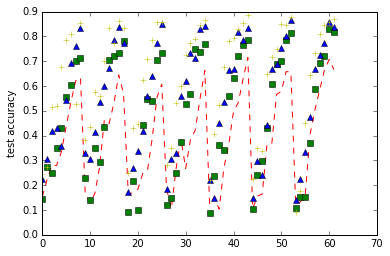


lengends: 
red line for 128, green square for 256, 
blue triangle for 512, yellow cross for 1024 neurons 
in fully connected layer



In [72]:
# show accuacy change trends 
legends = ["r--", "gs", "b^", "y+"]
for i in range(4):
    plt.plot(range(62), tables[i], legends[i])
plt.ylabel("test accuracy")
plt.show()

print """
lengends: 
red line for 128, green square for 256, 
blue triangle for 512, yellow cross for 1024 neurons 
in fully connected layer

neurons in two conv layers varies below ranges:
2, 4, 8, 16, 32. 64, 128, 256, 512
"""